In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mcdonalds.csv")

In [3]:
def func(i):
    if str(i)=='Never':
        return 0
    elif str(i)=='Once a year':
        return 1
    elif str(i)=='Every three months':
        return 2
    elif str(i)=='Once a month':
        return 3
    elif str(i)=='Once a week':
        return 4
    elif str(i)=='More than once a week':
        return 5

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
list = ['yummy',	'convenient',	'spicy',	'fattening',	'greasy',	'fast',	'cheap'	, 'tasty'	, 'expensive',	'healthy' ,	'disgusting']

In [7]:
for i in list:
    df[i] = df[i].apply(lambda x: 1 if x=="Yes" else 0)
  


In [8]:
df['Like'] = df['Like'].apply(lambda x:x[-1] if x=="I love it!+5" or "I hate it!-5" else int(x))

In [9]:
df['Like'] = df['Like'].apply(pd.to_numeric)

In [10]:
df['Gender'] = df['Gender'].apply(lambda x:  1 if x=="Male" else 0)

In [11]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,2.757743,44.604955,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,1.645749,14.221178,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,33.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,45.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,57.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,1.000000


In [12]:
list1 = ['yummy',	'convenient',	'spicy',	'fattening',	'greasy',	'fast',	'cheap'	, 'tasty'	, 'expensive',	'healthy' ,	'disgusting' , 'Gender']

In [13]:
df['VisitFrequency'] = df['VisitFrequency'].astype(str)

In [14]:
vfn = []

In [15]:
for i in df['VisitFrequency']:
    vfn.append(func(i))


In [16]:
df['VisitFrequencynum'] = vfn

In [17]:
x = df.loc[:,list1].values

In [18]:
x

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 1]], dtype=int64)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(x)
pf = pd.DataFrame(data = pc
             , columns = ['principal component 1', 'principal component 2'])

In [20]:
pf

,principal component 1,principal component 2
0,0.360699,-0.314246
1,-0.271777,0.288933
2,0.326076,0.610969
3,-0.239314,-0.439775
4,0.241102,-0.693957
...,...,...
1448,1.612038,0.310770
1449,-1.008625,-0.034596
1450,-0.225918,0.958570
1451,-1.098240,0.133613


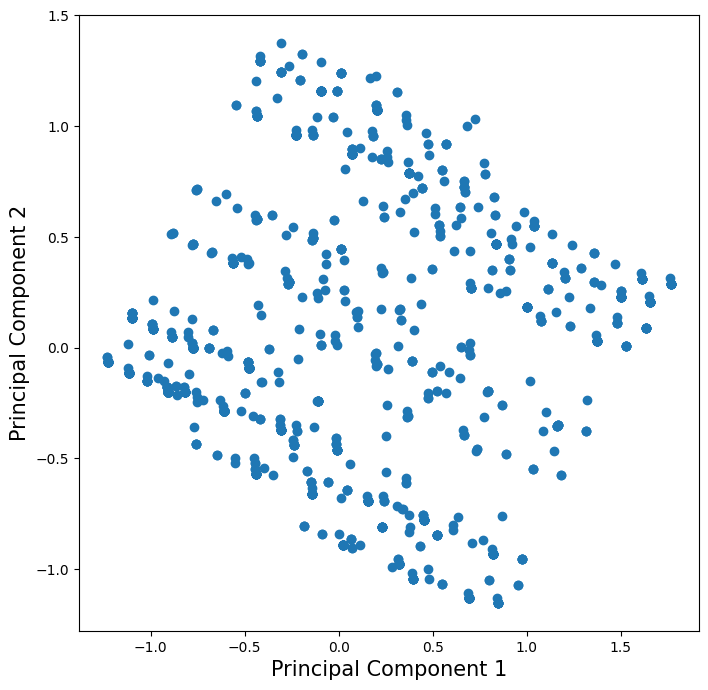

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.scatter(pf['principal component 1']
               , pf['principal component 2'])


In [22]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

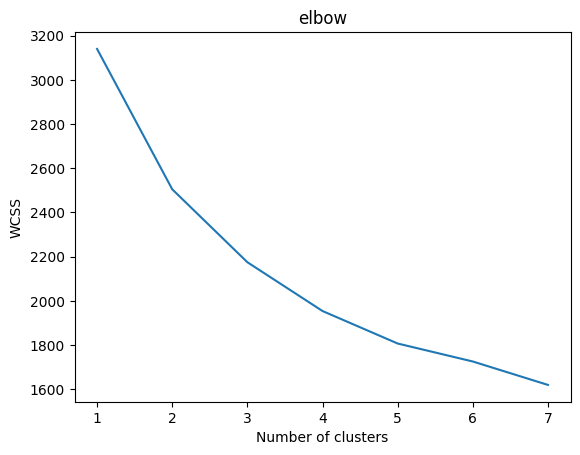

In [23]:
wcss=[]
for i in range(1,8):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

using k = 4

In [24]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [25]:
kmeansp = kmeans.predict(x)

In [26]:
labels = kmeans.labels_
print(labels[:100])

[1 2 2 0 1 0 2 0 3 2 1 2 1 2 3 0 0 2 3 2 2 2 2 2 0 2 0 1 1 0 0 0 0 1 0 1 0
 1 1 3 2 0 0 0 1 2 0 2 0 0 3 1 2 3 0 1 1 1 0 0 2 0 0 3 0 3 3 2 0 0 1 0 2 1
 0 3 0 3 2 0 3 1 1 0 3 0 2 2 2 2 0 0 3 1 0 2 1 1 3 0]


In [27]:
df['cluster_num'] = labels

In [28]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequencynum,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,3,61,Every three months,0,2,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0,2,2
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0,2,2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1,3,1


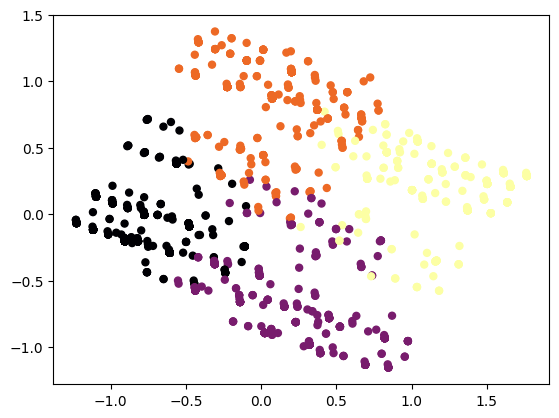

In [29]:
plt.scatter(pf['principal component 1'], pf['principal component 2'], c=kmeansp, s=25, cmap='inferno')

In [30]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

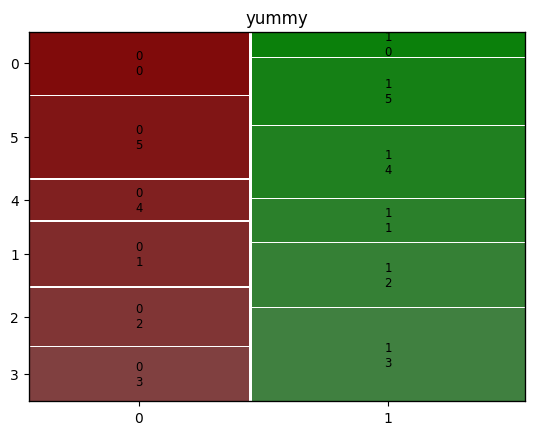

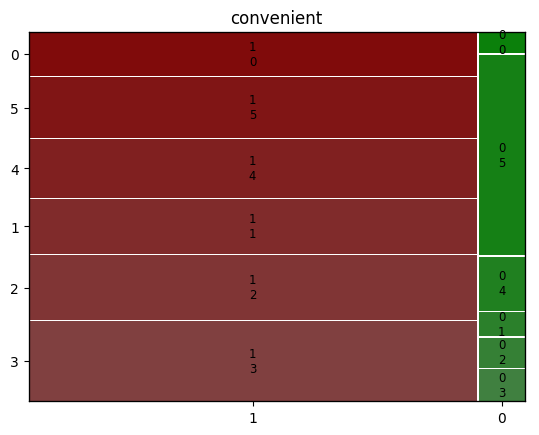

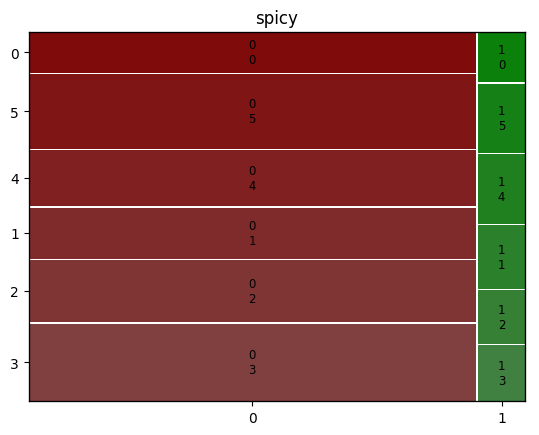

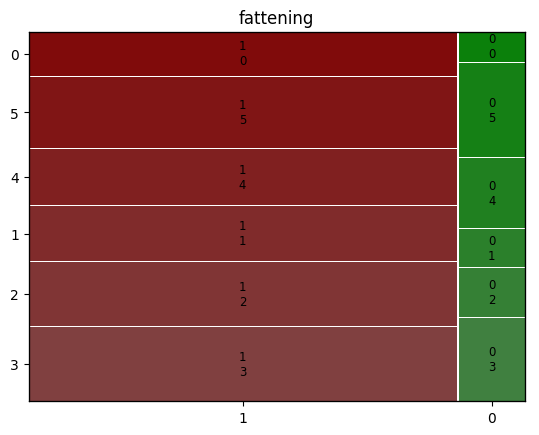

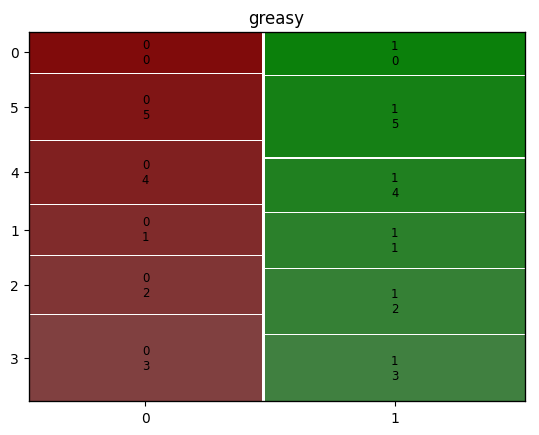

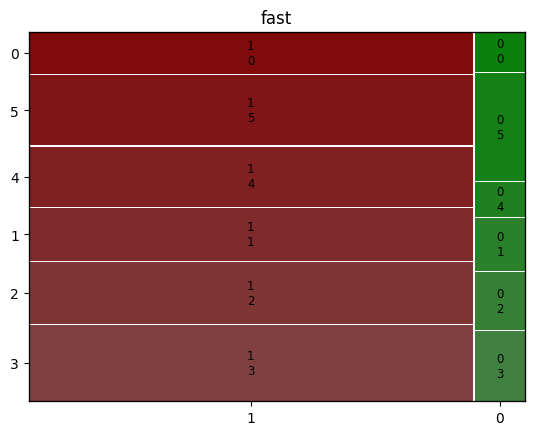

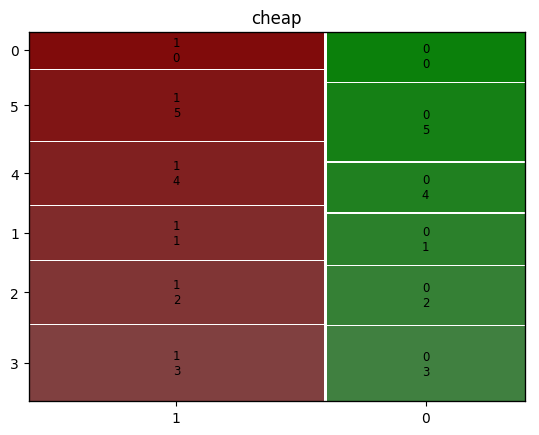

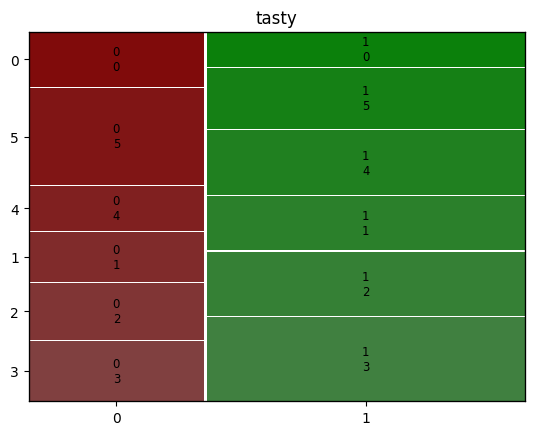

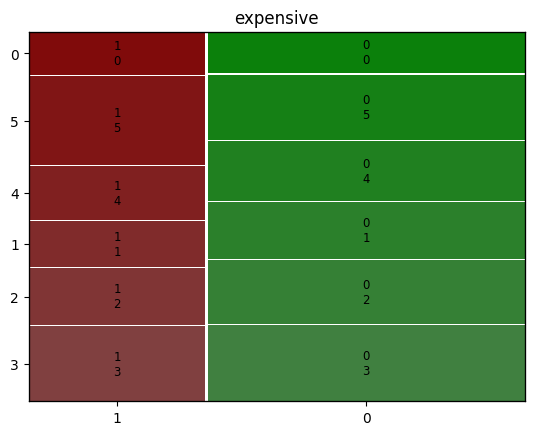

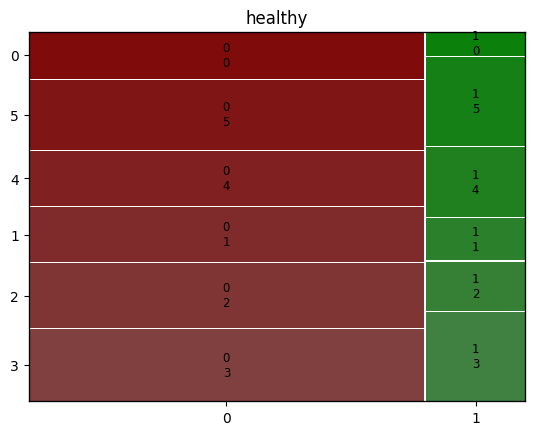

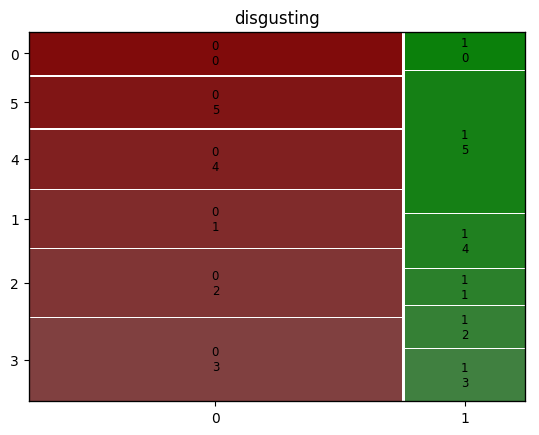

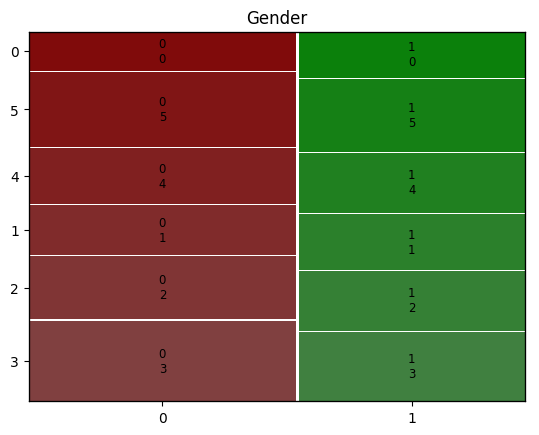

In [31]:
for i in list1:
    mosaic(df,[i , 'Like'],title = i)
    plt.show()

In [32]:
m2  = df.groupby(df['cluster_num'])
m2.mean()

C:\Users\hamza\AppData\Local\Temp\ipykernel_15352\456441739.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  m2.mean()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,VisitFrequencynum
cluster_num,,,,,,,,,,,,,,,
0,0.980583,0.980583,0.083495,0.788350,0.365049,0.961165,0.941748,0.980583,0.015534,0.351456,0.046602,3.050485,42.429126,0.372816,3.023301
1,0.018617,0.912234,0.087766,0.914894,0.587766,0.952128,0.885638,0.303191,0.013298,0.077128,0.324468,2.231383,49.404255,0.409574,1.704787
2,0.888199,0.965839,0.130435,0.900621,0.574534,0.857143,0.108696,0.919255,0.897516,0.198758,0.108696,2.652174,40.267081,0.549689,2.854037
3,0.020833,0.666667,0.075000,0.916667,0.712500,0.745833,0.070833,0.087500,0.908333,0.062500,0.716667,3.095833,47.575000,0.591667,1.441667


In [33]:
m2.max()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequencynum
cluster_num,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,5,71,Once a year,1,5
1,1,1,1,1,1,1,1,1,1,1,1,5,70,Once a year,1,4
2,1,1,1,1,1,1,1,1,1,1,1,5,70,Once a year,1,5
3,1,1,1,1,1,1,1,1,1,1,1,5,70,Once a year,1,5


In [34]:
m2.min()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequencynum
cluster_num,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,18,Every three months,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,18,Every three months,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,18,Every three months,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,18,Every three months,0,0


0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
1    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2             AxesSubplot(0.1,0.15;0.363636x0.340909)
3        AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

<Figure size 800x800 with 0 Axes>

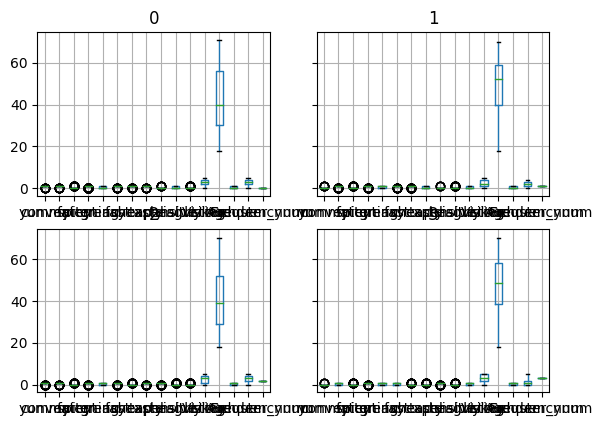

In [35]:
plt.figure(figsize=(8,8))
m2.boxplot()

cluster_num
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
2    AxesSubplot(0.125,0.11;0.775x0.77)
3    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

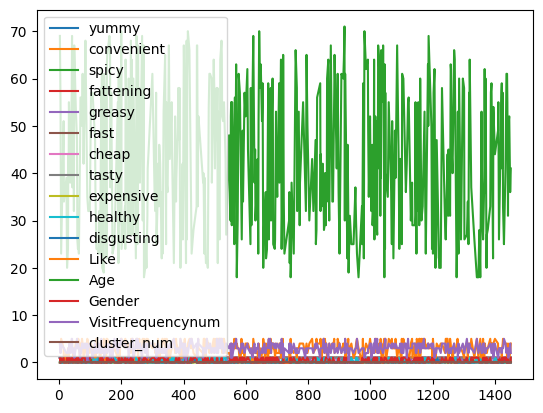

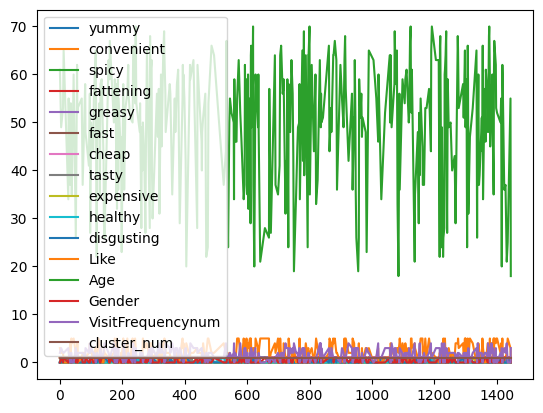

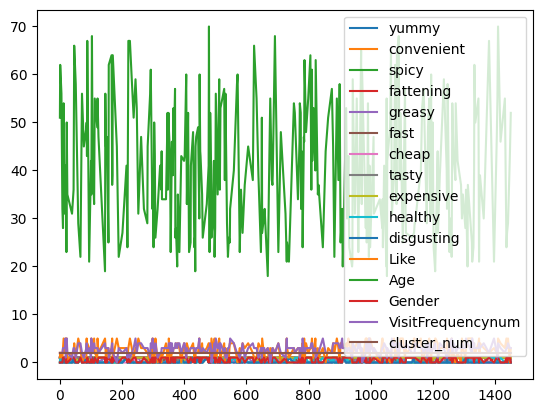

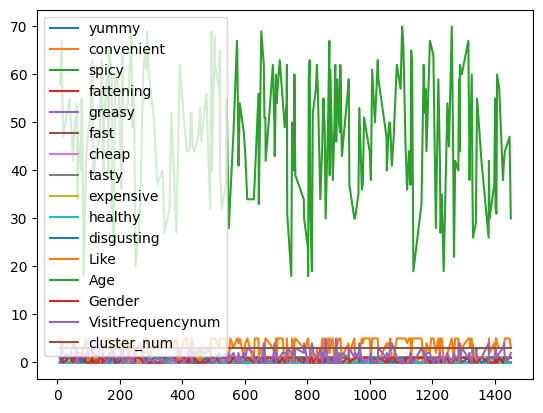

In [36]:
m2.plot()

cluster_num
0    [[AxesSubplot(0.125,0.722857;0.158163x0.157143...
1    [[AxesSubplot(0.125,0.722857;0.158163x0.157143...
2    [[AxesSubplot(0.125,0.722857;0.158163x0.157143...
3    [[AxesSubplot(0.125,0.722857;0.158163x0.157143...
dtype: object

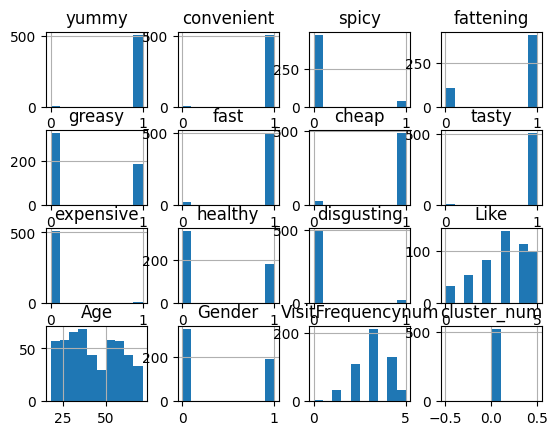

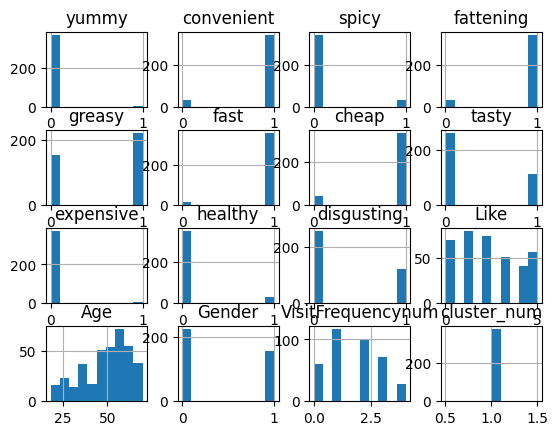

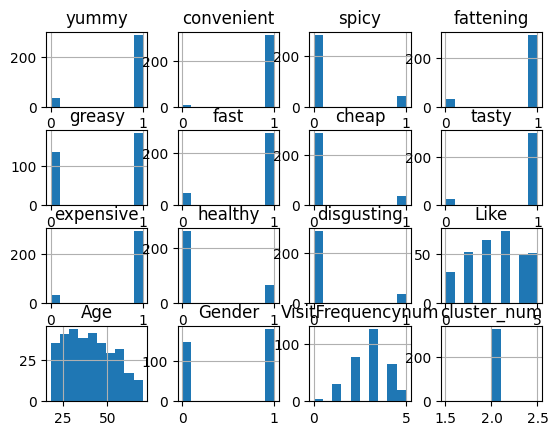

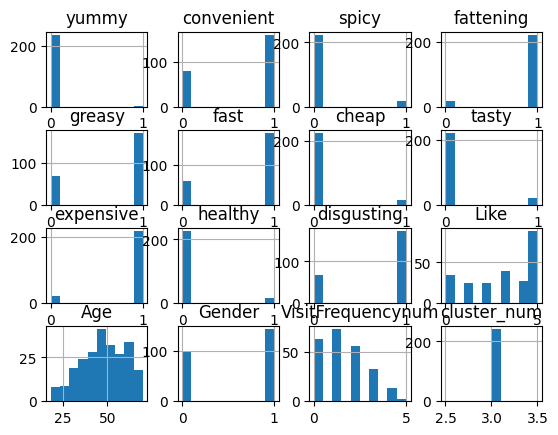

In [37]:
m2.hist()

In [38]:
m2.Like.mean()

cluster_num
0    3.050485
1    2.231383
2    2.652174
3    3.095833
Name: Like, dtype: float64

In [39]:
m2.VisitFrequencynum.mean()

cluster_num
0    3.023301
1    1.704787
2    2.854037
3    1.441667
Name: VisitFrequencynum, dtype: float64

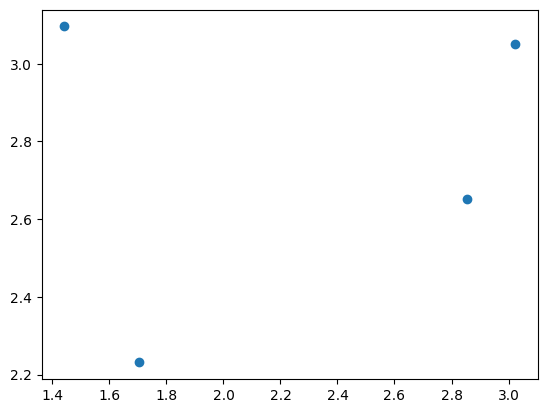

In [40]:
plt.scatter(m2.VisitFrequencynum.mean(),m2.Like.mean())

In [41]:
dff = df.loc[df['cluster_num']==2]

In [42]:
dff

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequencynum,cluster_num
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0,2,2
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0,2,2
6,1,1,1,1,0,1,0,1,1,1,0,2,56,Every three months,0,2,2
9,1,1,0,1,1,1,0,1,1,0,0,1,32,Every three months,0,2,2
11,1,1,0,1,1,1,0,1,1,0,1,3,28,Once a month,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1,1,0,1,1,1,0,1,1,0,0,5,24,Once a month,1,3,2
1438,1,1,0,1,1,1,0,1,1,0,0,3,27,Once a month,0,3,2
1441,1,1,0,1,1,1,0,1,1,0,0,5,29,Once a week,1,4,2
1447,0,1,0,1,1,0,0,1,1,0,0,0,43,Once a month,1,3,2


In [43]:
dff.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,VisitFrequencynum,cluster_num
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.0
mean,0.888199,0.965839,0.130435,0.900621,0.574534,0.857143,0.108696,0.919255,0.897516,0.198758,0.108696,2.652174,40.267081,0.549689,2.854037,2.0
std,0.315612,0.181927,0.337305,0.299636,0.495183,0.350472,0.311741,0.272868,0.303756,0.399686,0.311741,1.553855,13.327767,0.498299,1.070912,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,29.000000,0.000000,2.000000,2.0
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,39.000000,1.000000,3.000000,2.0
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,51.750000,1.000000,4.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,70.000000,1.000000,5.000000,2.0


<AxesSubplot: >

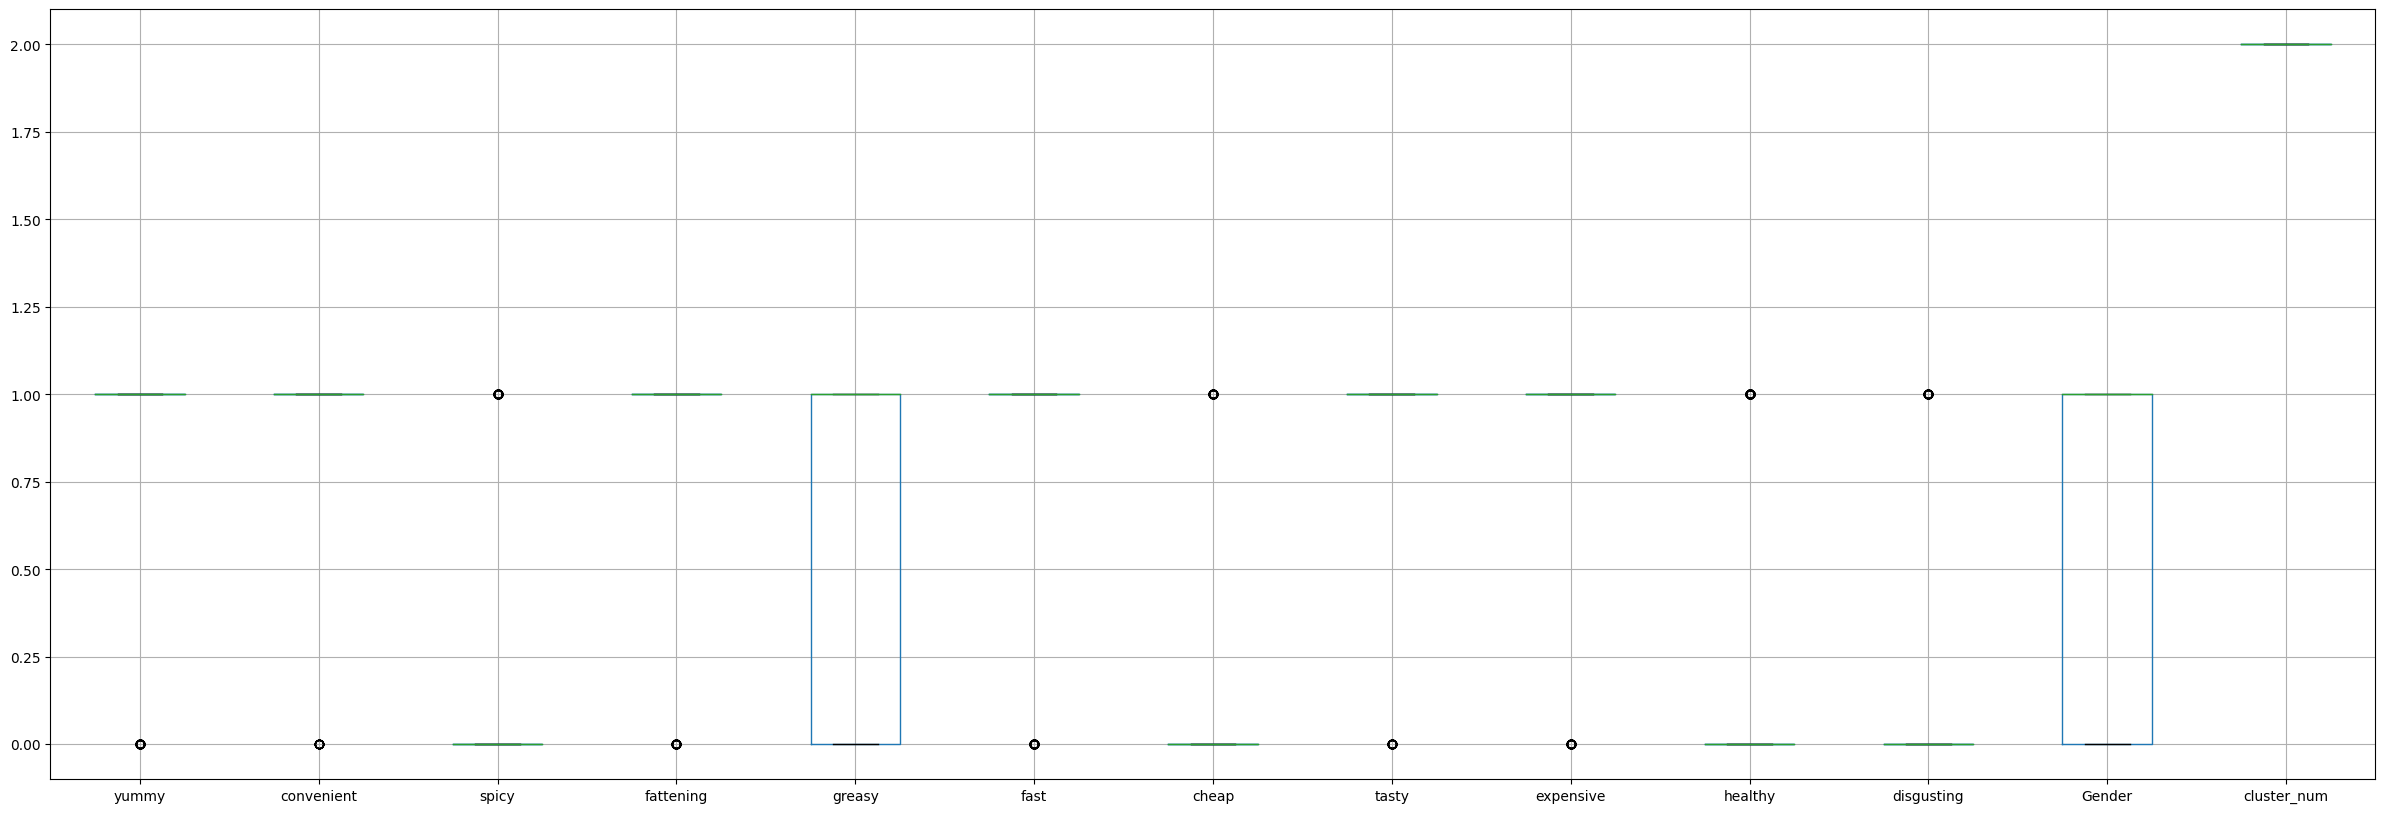

In [44]:
dff2 = dff.drop(['Age','Like','VisitFrequencynum'], axis = 1)
plt.figure(figsize = (30,10))
dff2.boxplot()

array([[<AxesSubplot: title={'center': 'yummy'}>,
        <AxesSubplot: title={'center': 'convenient'}>,
        <AxesSubplot: title={'center': 'spicy'}>,
        <AxesSubplot: title={'center': 'fattening'}>],
       [<AxesSubplot: title={'center': 'greasy'}>,
        <AxesSubplot: title={'center': 'fast'}>,
        <AxesSubplot: title={'center': 'cheap'}>,
        <AxesSubplot: title={'center': 'tasty'}>],
       [<AxesSubplot: title={'center': 'expensive'}>,
        <AxesSubplot: title={'center': 'healthy'}>,
        <AxesSubplot: title={'center': 'disgusting'}>,
        <AxesSubplot: title={'center': 'Gender'}>],
       [<AxesSubplot: title={'center': 'cluster_num'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

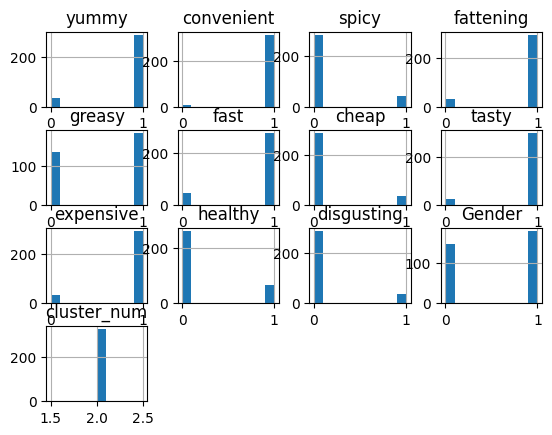

In [45]:
dff2.hist()